#Lab 2
###Graham Roberts

|$I$|$\delta I$|$R$|$\delta R$|$B$|$\delta B$|$r$|$\delta r$|
|--|--|--|--|--|--|--|--|
|2.45|.05|113|1|3.3|.14|86|1.05|
|1.85|.05|93.76|2.2|2.5|.12|67|2.25|
|2.25|.05|107.5|.5|3.1|.14|80.7|0.55|


In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
#multiplicationU
#multiplication with uncertainty propogation
#
#argument:
#   x: a factor to be multiplied
#xDel: the uncertainty in x
#   y: a factor to be multiplied
#yDel: the uncertainty in y
#
#returns:
#   p: the product of x and y
#pdel: the uncertainty in the product
def multiplicationU(x,xDel,y,yDel):
    p=x*y
    pDel=p*(float(xDel/math.fabs(x)+float(yDel/math.fabs(y))))
    return p,pDel

In [36]:
#subtractionU
#subtraction with uncertainty propogation
#
#arguments:
#   x: the minuend to subtract from
#xDel: the uncertainty in x
#   y: the subtrahend to be subtracted
#yDel: the uncertainty in y
#
#returns:
#   d: the difference in x and y
#dDel: the uncertainty in d
def subtractionU(x,xDel,y,yDel):
    d=x-y
    dDel=xDel+yDel
    return d, dDel

In [37]:


I=[2.45,1.85,2.25]
delI=0.05
R=[113.,93.76,107.5]
delR=[1.,2.2,0.5]
radius=53.65/2.
delRadius=0.05
B=[]
delB=[]
r=[]
delr=[]
for datum in I:
    b,db=multiplicationU(datum,.05,1.36,.03)
    B.append(b)
    delB.append(db)
    
for i in range(0,len(R)):
    lilr, delilr=subtractionU(R[i],delR[i],radius,delRadius)
    r.append(lilr)
    delr.append(delilr)
    
print"B"
print B
print 'delB'
print delB
print 'r'
print r
print 'delr'
print delr


B
[3.3320000000000003, 2.5160000000000005, 3.06]
delB
[0.14150000000000001, 0.12350000000000003, 0.13549999999999998]
r
[86.175, 66.935, 80.675]
delr
[1.05, 2.25, 0.55]


[ 0.04186993 -0.29352064]
[ 0.04622325 -0.55858707]
[ 0.03795609 -0.07331088]
0.513430033713
0.0744431033893


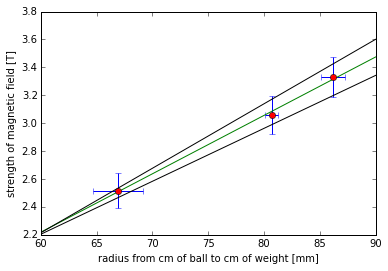

In [38]:
r=np.array(r)
B=np.array(B)
delr=np.array(delr)
delB=np.array(delB)
model=np.polyfit(r,B,1)
maxmodel=np.polyfit(r+delr,B+delB,1)
minmodel=np.polyfit(r-delr,B-delB,1)
print model
print maxmodel
print minmodel
Slope=model[0]
delSlope=np.max(maxmodel[0]-model[0],model[0]-minmodel[0])
m=1.25
delm=.05
g=9.81
delg=.01
weight,delweight=multiplicationU(m,delm,g,delg)
Moment, delMoment=multiplicationU(weight,delweight,Slope,delSlope)
print Moment
print delMoment
line=np.linspace(60,90,100)
fit=np.array([model[1]+model[0]*i for i in line])
plt.errorbar(r,B,xerr=delr,yerr=delB,fmt='none')
plt.plot(line,fit,'g-')
plt.plot(line,np.array([maxmodel[1]+maxmodel[0]*i for i in line]),'k-')
plt.plot(line,np.array([minmodel[1]+minmodel[0]*i for i in line]),'k-')
plt.plot(r,B,'ro')
plt.xlabel('radius from cm of ball to cm of weight [mm]')
plt.ylabel('strength of magnetic field [T]')

I estimate that $\mu=0.51\pm0.07\tfrac{\mathrm{Nm}}{\mathrm{T}}$. This was calculated by plotting three points, and finding a linear regression to match them.  The value $\frac{r}{b}$ was the estimated slope of the line, with uncertainty estimated by fitting a regeression to the maximum and minimum values resepectively.  It was then multiplied by $g=9.81\pm0.01\tfrac{\mathrm{m}}{\mathrm{s^2}}$ with uncertainty to account for elevation, etc.  All multiplication and division had propogation of errors built into the functions using the fractional or additive uncertainty that we discussed in class.